In [1]:
import dataset as dt

#uncomment next line if the user has not downloaded the set
#dt.dowloadMNISTData() 
trainImages = dt.getImages("train")
trainLabels = dt.getLabels("train")

testImages = dt.getImages("test")
testLabels = dt.getLabels("test")


In [3]:
import mlp

#this cell demonstrates training of a neural network
#recall that thanks to the nature of the implementation the user can choose differe
#define hyperparameters
layers = 5
neuron = [784, 512, 256, 128,  10]
activf = ["relu", "relu", "relu", "softmax"]
init = "random"

perceptron = mlp.MLP(layers, neuron, activf, init)

epochs = 5 #epochs we want to run it
learningRate = 0.1
numBatch = 100 #number of batches for the training data
error, accuracy = perceptron.train(trainImages, trainLabels, testImages, testLabels, epochs, learningRate, numBatch)

c:\Users\juanc\OneDrive - uah.edu\Documentos\UAH\Deep Learning\MLP\TarratJuan\mlp.py:104: RuntimeWarning: overflow encountered in matmul
  zValues.append(aValues[l] @ self.wValues[l] + self.bValues[l])
c:\Users\juanc\OneDrive - uah.edu\Documentos\UAH\Deep Learning\MLP\TarratJuan\mlp.py:162: RuntimeWarning: overflow encountered in matmul
  dw[l] = aValues[l-1].T @ dz
c:\Users\juanc\OneDrive - uah.edu\Documentos\UAH\Deep Learning\MLP\TarratJuan\mlp.py:162: RuntimeWarning: invalid value encountered in matmul
  dw[l] = aValues[l-1].T @ dz
C:\Users\juanc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\numpy\core\fromnumeric.py:86: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


0
1
2
3
4


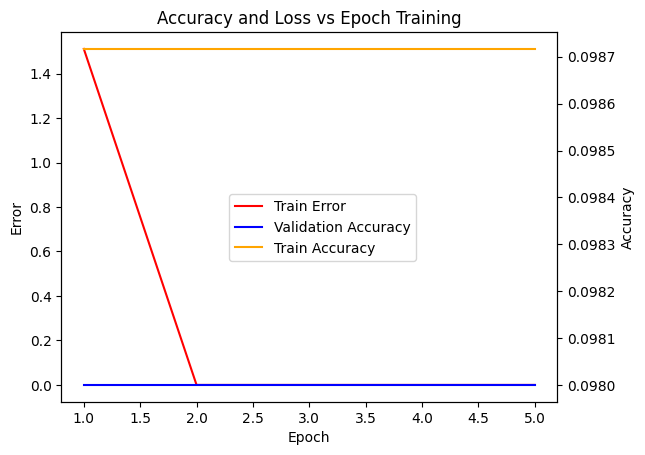

In [4]:
import matplotlib.pyplot as plt

ep = [i for i in range(1, epochs + 1)] #array for epochs

#we will first plot the accuracy of both the test and the tr
fig, ax1 = plt.subplots()

ax1.plot(ep, error['t'], color = 'red', label = "Train Error")

ax2 = ax1.twinx()
ax2.plot(ep, accuracy['v'], color = 'blue', label = "Validation Accuracy")
ax2.plot(ep, accuracy['t'], color = 'orange', label = "Train Accuracy")

ax1.set_ylabel("Error")
ax2.set_ylabel("Accuracy")
ax1.set_xlabel("Epoch")
ax1.set_title("Accuracy and Loss vs Epoch Training")

fig.legend(loc = "center")
plt.show()

#plot generated by the cell above is included in the .zip file

In [6]:
countGood = 0
total = len(testImages)
for image, label in zip(testImages, testLabels):
    res = perceptron.predict(image, label, 1)
    if(res[0] == res[1]):
        countGood += 1

print("Accuracy of the model for the test set is " + str(countGood/total))

Accuracy of the model for the test set is 0.8032


In [ ]:
import mlp

perceptron.saveToFile("2_hidden_0_7.txt")

In [ ]:
import mlp

#this shows the procedure to load an existing network from a file
#the network is a 2-hidden layer with sigmoid activation functions
neurons = []
activations = [] #information about the activation function in each layer

with open("2_hidden_0_7.txt", "r") as file:
    line = file.readline()
    for i in line.strip().split(" "):
        neurons.append(int(i))
    
    line = file.readline()
    for i in line.strip().split(" "):
        activations.append(i)

perceptron_2 = mlp.MLP(len(neurons), neurons, activations, "2_hidden_0_7.txt")

In [ ]:
countGood = 0
total = len(testImages)
c = 0
for image, label in zip(testImages, testLabels):
    res = perceptron_2.predict(image, label, 1)
    if(res[0] == res[1]):
        countGood += 1
print(countGood/total)

In [ ]:
import random
num = random.randint(0, len(testImages) - 1)
#we will demonstrate how the network predicts a number based on an input
print(perceptron_2.predict(testImages[num], testLabels[num], 1))

In [4]:
# 2 hidden layer neural network (showing that it works, not going for accuracy as before)
import mlp

#this cell demonstrates training of a neural network
#recall that thanks to the nature of the implementation the user can choose differe
#define hyperparameters
layers = 4
neuron = [784, 256, 128,  10]
activf = ["relu", "sigmoid", "sigmoid"]
init = "random"

perceptron_3 = mlp.MLP(layers, neuron, activf, init)

epochs = 5 #epochs we want to run it
learningRate = 0.1
numBatch = 1000 #number of batches for the training data
error, accuracy = perceptron_3.train(trainImages, trainLabels, testImages, testLabels, epochs, learningRate, numBatch, "hinge-loss")

0
